### 경사하강법 구현

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 데이터
X = np.array([0.0, 1.0, 2.0])
y = np.array([3.0, 3.5, 5.5])

# 기울기와 절편값을 0으로 초기화
W = 0 
b = 0 

# 하이퍼파라미터
lrate = 0.01 
epochs = 1000

In [5]:
n = float(len(X))  # 데이터 개수 (실수형으로 저장)

3.0

In [6]:
for i in range(epochs):
    y_pred = W*X + b  # hypothesis
    
    # gradient
    dW = (2/n) * sum(X*(y_pred - y)) 
    db = (2/n) * sum(y_pred - y)
    
    # update
    W = W-lrate*dW 
    b = b-lrate*db

In [9]:
print(W, b)  # 최종 결과

y_pred = W*X + b
print(y_pred)

1.2532418085611319 2.745502230882486
[2.74550223 3.99874404 5.25198585]


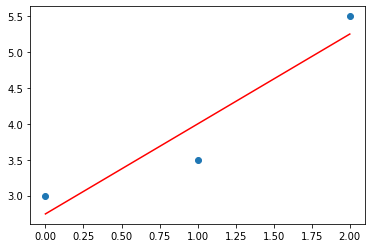

In [11]:
plt.scatter(X, y)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')

### 선형회귀 실습1

In [12]:
from sklearn import linear_model

In [16]:

X = [[0], [1], [2]]  # 입력은 2차원으로
y = [3, 3.5, 5.5]

In [17]:
lr = linear_model.LinearRegression()  # 모델 생성
lr.fit(X,y)

LinearRegression()

In [19]:
print(lr.coef_)  # 기울기
print(lr.intercept_)  # 절편 

[1.25]
2.7500000000000004


In [20]:
lr.score(X,y)

0.8928571428571429

In [21]:
lr.predict([[5]])

array([9.])

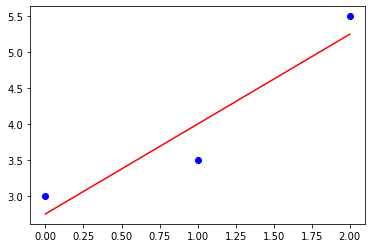

In [22]:
plt.scatter(X, y, color='b')
y_pred = lr.predict(X)

plt.plot(X, y_pred, color='red')
plt.show()

### 실습2
- 키와 몸무게

In [31]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

In [32]:
X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]

lr.fit(X, y)

LinearRegression()

In [33]:
lr.coef_ , lr.intercept_

(array([0.82021132]), -68.0248807089298)

In [34]:
lr.predict([[165]])

array([67.30998637])

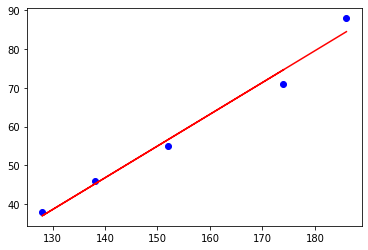

In [35]:
plt.scatter(X, y, color='b')
y_pred = lr.predict(X)

plt.plot(X, y_pred, color='red')
plt.show()

array([67.30998637])

### 실습3
- 당뇨병

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [40]:
X, y = datasets.load_diabetes(return_X_y=True)  # 특징, 정답데이터 한 번에 불러오기

In [51]:
# BMI 특징만 추려내서 2차원으로 만들기
X_new = X[:, 2].reshape(len(X[:,2]), -1)  # [X:, np.newaxis, 2]와 동일

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=0)

In [54]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

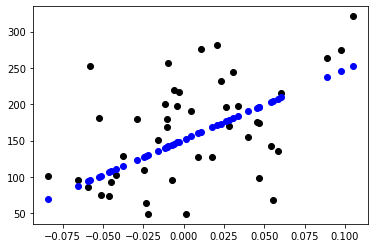

In [62]:
y_pred = lr.predict(X_test)

plt.scatter(X_test, y_test, color='black')  # 정답
plt.scatter(X_test, y_pred, color="blue")     # 예측값 